## Linear Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[-8.2252531   9.37454232  3.63112584  2.3632745   4.20340543 -2.57922458
 -4.62368312 -9.84017175  0.09111031 -9.36362457]
[-11.450506191063361, 23.749084633245126, 12.2622516789652, 9.7265490059501722, 13.40681085483984, -0.15844915393890346, -4.2473662347070018, -14.680343508502098, 5.182220628075985, -13.727249140281014]


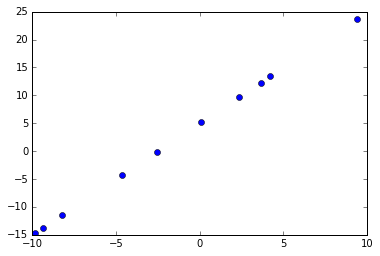

In [3]:
from sklearn import linear_model

def func_predict(x):
    return 2*x + 5

inp = np.random.uniform(-10,10,10)
out = map(func_predict,inp)
print inp
print out
plt.plot(inp,out,'o');

[ 2.]
5.0


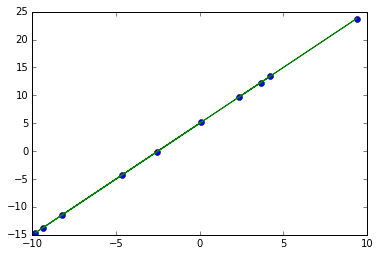

In [4]:
lin_reg_model = linear_model.LinearRegression()
lin_reg_model.fit(inp.reshape(-1,1), out)

print lin_reg_model.coef_
print lin_reg_model.intercept_

plt.plot(inp,out,'o')
plt.plot(inp,lin_reg_model.predict(inp.reshape(-1,1)));

In [5]:
def func_predict_with_error(x):
    return 2*x + 5 + np.random.normal(scale=1,size=1)

inp_error = np.random.uniform(-10,10,10)
out_error = map(func_predict_with_error,inp_error)

lin_reg_model_error = linear_model.LinearRegression()
lin_reg_model_error.fit(inp_error.reshape(-1,1), out_error)

print lin_reg_model_error.coef_
print lin_reg_model_error.intercept_


[[ 2.03507464]]
[ 4.67775438]


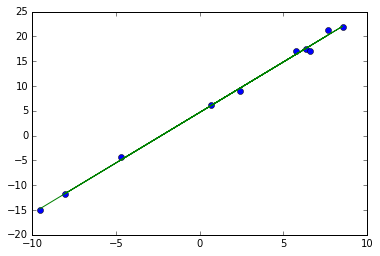

In [6]:
plt.plot(inp_error, out_error, 'o')
plt.plot(inp_error, lin_reg_model_error.predict(inp_error.reshape(-1,1)));

## Bias-Variance Tradeoff
[Illustration for Bias Variable Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html)

## Overfit and Underfit
A model is said to **overfit** if it does not **generalizes** well for unknown data. The model overfits on training data but does not fit on unknown data.  
**Underfitting** refers to a model that can neither model the training data not generalize to new data.  
[Illustration of underfit and overfit](http://blog.fliptop.com/blog/2015/03/02/bias-variance-and-overfitting-machine-learning-overview/)

### Illustration of overfit and underfit through Non-linear regression

[Evaluation metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)  
[Confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

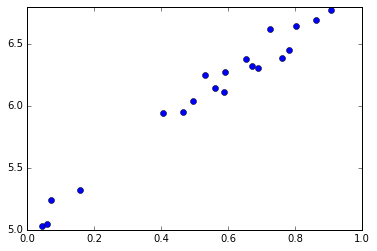

In [7]:
from sklearn import metrics

X_nonlinear_train = np.random.random(size=(20, 1))
Y_nonlinear_train = 2 * X_nonlinear_train.squeeze() + 5 + 0.1*np.random.randn(20)

## We will use 20 points as training data and the rest 10 points as test data
X_nonlinear_test = np.ones((10,1)) + np.random.random(size=(10,1))
Y_nonlinear_test = 2 * X_nonlinear_test.squeeze() + 5 + 0.1*np.random.random(10)
plt.plot(X_nonlinear_train, Y_nonlinear_train,'o');

Mean absolute training error for linear model:  0.0737719737077
Mean absolute test error for linear model:  0.0864050448232


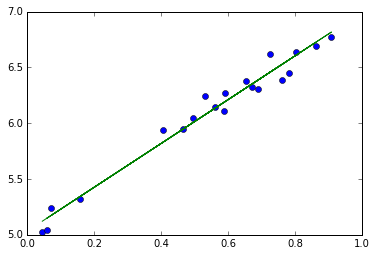

In [8]:
lin_model = linear_model.LinearRegression()
lin_model.fit(X_nonlinear_train, Y_nonlinear_train)

print "Mean absolute training error for linear model: ", metrics.mean_absolute_error(Y_nonlinear_train, lin_model.predict(X_nonlinear_train))
print "Mean absolute test error for linear model: ", metrics.mean_absolute_error(Y_nonlinear_test, lin_model.predict(X_nonlinear_test))
plt.plot(X_nonlinear_train, Y_nonlinear_train,'o')
plt.plot(X_nonlinear_train, lin_model.predict(X_nonlinear_train));

In [9]:
## Another way is numpy.polyfit
from numpy import linspace
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(X_train, Y_train, X_test, Y_test, deg=2):
    poly = PolynomialFeatures(degree=deg)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)
    poly_model = linear_model.LinearRegression()
    poly_model.fit(X_poly_train, Y_train)
    
    x_sample = linspace(0, 1, 200)
    y_sample = poly_model.intercept_
    
    for i in range(deg+1):
        y_sample +=  poly_model.coef_[i]*x_sample**i
    
    print "Mean absolute training error for degree={} is: {}".format(deg, metrics.mean_absolute_error(Y_train, poly_model.predict(X_poly_train)))
    print "Mean absolute validation error for degree={} is: {}".format(deg, metrics.mean_absolute_error(Y_test, poly_model.predict(X_poly_test)))
    
    plt.plot(X_train, Y_train, 'o')
    plt.plot(x_sample, y_sample);

Mean absolute training error for degree=2 is: 0.0672793417428
Mean absolute validation error for degree=2 is: 0.687327941409


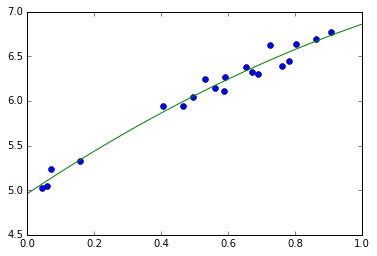

In [10]:
polynomial_regression(X_nonlinear_train, Y_nonlinear_train, X_nonlinear_test, Y_nonlinear_test, 2)

Mean absolute training error for degree=10 is: 0.057335858629
Mean absolute validation error for degree=10 is: 167013.354543


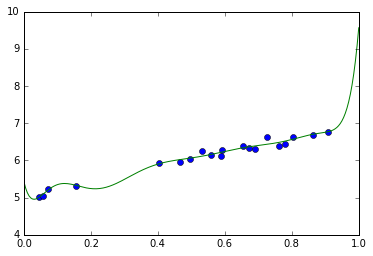

In [16]:
polynomial_regression(X_nonlinear_train, Y_nonlinear_train, X_nonlinear_test, Y_nonlinear_test, 10)

In [ ]:
polynomial_regression(X_nonlinear, Y_nonlinear, X_nonlinear_test, Y_nonlinear_test, 4)

In [ ]:
polynomial_regression(X_nonlinear, Y_nonlinear, X_nonlinear_test, Y_nonlinear_test, 5)

In [ ]:
polynomial_regression(X_nonlinear, Y_nonlinear, X_nonlinear_test, Y_nonlinear_test, 6)

In [ ]:
polynomial_regression(X_nonlinear, Y_nonlinear, X_nonlinear_test, Y_nonlinear_test, 30)

## Validation and Model Selection
One of the most important pieces of machine learning is model validation: that is, checking how well your model fits a given dataset.
Consider the digits example we've been looking at previously. How might we check how well our model fits the data?

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

##Actual input values
## 64 features
## Value in the range of 0 to 100
print X[0,:].reshape(8,8)
print y[0]

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
0


Let's try our simplest classification algorithm: KNN classifier

In [18]:
from sklearn import neighbors
import numpy

KNN_classifier = neighbors.KNeighborsClassifier(n_neighbors=1)
#KNN_classifier = ensemble.RandomForestClassifier(n_estimators=50)
KNN_classifier.fit(X, y)
y_pred = KNN_classifier.predict(X)

In [19]:
from sklearn import metrics

print("{0:.2f}".format(metrics.accuracy_score(y, y_pred)))

1.00


### Validation Sets
Last week we discussed validation sets very briefly. It is a labeled dataset which is kept separate from training data. We use this data to test out the model on unseen data.
Above we made the mistake of testing our data on the same set of data that was used for training. This is not generally a good idea. If we optimize our estimator this way, we will tend to **over-fit** the data: that is, we learn the noise.  

In [20]:
from sklearn.cross_validation import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3)
X_train.shape, X_validation.shape

((1257, 64), (540, 64))

In [21]:
for i in range(1,51):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    #knn = ensemble.RandomForestClassifier(n_estimators=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_validation)
    print "Validation Accuracy (neighbors = {}): {}".format(i, metrics.accuracy_score(y_validation, y_pred))

Validation Accuracy (neighbors = 1): 0.977777777778
Validation Accuracy (neighbors = 2): 0.972222222222
Validation Accuracy (neighbors = 3): 0.974074074074
Validation Accuracy (neighbors = 4): 0.966666666667
Validation Accuracy (neighbors = 5): 0.966666666667
Validation Accuracy (neighbors = 6): 0.964814814815
Validation Accuracy (neighbors = 7): 0.966666666667
Validation Accuracy (neighbors = 8): 0.962962962963
Validation Accuracy (neighbors = 9): 0.957407407407
Validation Accuracy (neighbors = 10): 0.959259259259
Validation Accuracy (neighbors = 11): 0.959259259259
Validation Accuracy (neighbors = 12): 0.955555555556
Validation Accuracy (neighbors = 13): 0.955555555556
Validation Accuracy (neighbors = 14): 0.955555555556
Validation Accuracy (neighbors = 15): 0.951851851852
Validation Accuracy (neighbors = 16): 0.951851851852
Validation Accuracy (neighbors = 17): 0.951851851852
Validation Accuracy (neighbors = 18): 0.948148148148
Validation Accuracy (neighbors = 19): 0.95
Validation A

### k-fold Cross Validation
One problem with validation sets is that you "lose" some of the data. Above, we've only used 70% of the data for the training, and used 30% for the validation. We don't get to train with the remaining 30% of the data.  
So to kind of normalize the result we perform k-fold cross validation. 
* Divide the labeled data into k equal parts
* for i:=1 to k:
* validation data = part[i]
* train on remaining parts
* get you prediction accuracy  
With the above method we will have k accuracies.  **5-fold cross validation** is the most popular validation technique.

In [22]:
from sklearn.cross_validation import cross_val_score

for i in range(1,11):
    cv = cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=i), X, y, cv=5)
    print "Accuracy (neighbors = {}): {}".format(i,cv.mean())

Accuracy (neighbors = 1): 0.96497520948
Accuracy (neighbors = 2): 0.9666281215
Accuracy (neighbors = 3): 0.966114353704
Accuracy (neighbors = 4): 0.963905777966
Accuracy (neighbors = 5): 0.962789911497
Accuracy (neighbors = 6): 0.959418977829
Accuracy (neighbors = 7): 0.960000663612
Accuracy (neighbors = 8): 0.957772086865
Accuracy (neighbors = 9): 0.956125316454
Accuracy (neighbors = 10): 0.955015727202
